In [82]:
import numpy as np
from scipy.special import hermite, gamma
import matplotlib.pyplot as plt
from scipy.stats import norm
plt.style.use('seaborn-darkgrid')

# Part 1: Basics in Numerical Methods 

## Question 1

For s = 1.0000, F(t,s) = 0.9950
For s = 1.0202, F(t,s) = 0.9753
For s = 1.0404, F(t,s) = 0.9564
For s = 1.0606, F(t,s) = 0.9382
For s = 1.0808, F(t,s) = 0.9206
For s = 1.1010, F(t,s) = 0.9037
For s = 1.1212, F(t,s) = 0.8874
For s = 1.1414, F(t,s) = 0.8717
For s = 1.1616, F(t,s) = 0.8566
For s = 1.1818, F(t,s) = 0.8419
For s = 1.2020, F(t,s) = 0.8278
For s = 1.2222, F(t,s) = 0.8141
For s = 1.2424, F(t,s) = 0.8009
For s = 1.2626, F(t,s) = 0.7880
For s = 1.2828, F(t,s) = 0.7756
For s = 1.3030, F(t,s) = 0.7636
For s = 1.3232, F(t,s) = 0.7520
For s = 1.3434, F(t,s) = 0.7406
For s = 1.3636, F(t,s) = 0.7297
For s = 1.3838, F(t,s) = 0.7190
For s = 1.4040, F(t,s) = 0.7087
For s = 1.4242, F(t,s) = 0.6986
For s = 1.4444, F(t,s) = 0.6889
For s = 1.4646, F(t,s) = 0.6794
For s = 1.4848, F(t,s) = 0.6701
For s = 1.5051, F(t,s) = 0.6611
For s = 1.5253, F(t,s) = 0.6524
For s = 1.5455, F(t,s) = 0.6438
For s = 1.5657, F(t,s) = 0.6355
For s = 1.5859, F(t,s) = 0.6274
For s = 1.6061, F(t,s) = 0.6195
For s = 

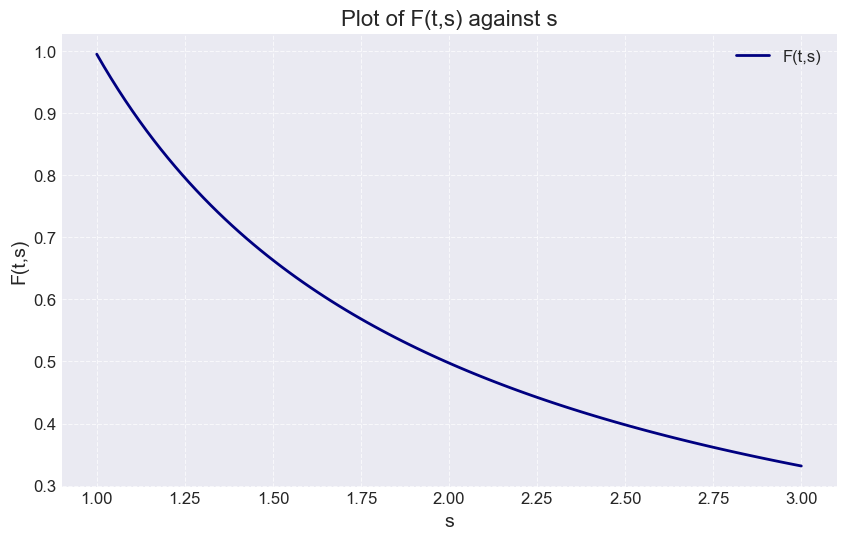

In [83]:
# Given parameters
r = 0.02 # The risk- free interest rate
sigma = 0.2 # The volatility
T_minus_t = 0.5 # The time to maturity

# Function to compute the expectation E[Φ(ST)] for given s
def compute_expectation(s, nodes, weights, r, sigma, T_minus_t):
    # Calculate the stock price ST using the  Gauss-Hermite nodes
    ST = s * np.exp((r - 0.5 * sigma**2) * T_minus_t + sigma * np.sqrt(T_minus_t) * nodes)
    #return the expectation E[Φ(ST)] using the Gauss-Hermite weights
    return np.sum(weights * (1/ST)) / np.sqrt(np.pi) #

def gauss_hermite_quadrature(n):
    # Calculate the nodes and weights for the Gauss-Hermite quadrature
    nodes, weights = np.polynomial.hermite.hermgauss(n)

    # Compute prices for s in range [1,3] with 100 uniform nodes
    s_values = np.linspace(1, 3, 100)
    prices = []
    for s in s_values:
        expectation = compute_expectation(s, nodes, weights, r, sigma, T_minus_t)
        price = np.exp(-r * T_minus_t) * expectation
        prices.append(price)

    return s_values, prices

# Number of nodes and weights for Gauss-Hermite quadrature
n = 100

# Calculate the price 
s_values, prices = gauss_hermite_quadrature(n)

for s, price in zip(s_values, prices):
    print(f"For s = {s:.4f}, F(t,s) = {price:.4f}")
   
#Plot F(t,s) against s

plt.figure(figsize=(10, 6), dpi=100)
plt.plot(s_values, prices, label="F(t,s)", color='navy', linewidth=2)
plt.xlabel("s", fontsize=14)
plt.ylabel("F(t,s)", fontsize=14)
plt.title("Plot of F(t,s) against s", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.show()

## Question 2

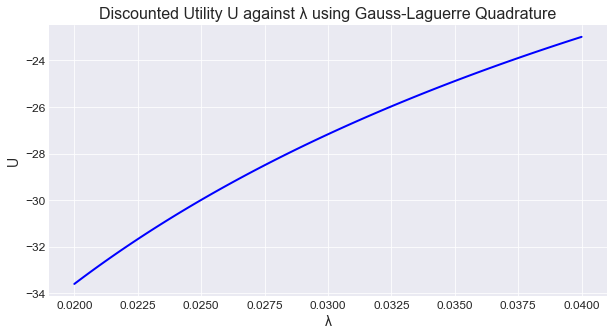

In [84]:

# Parameters
rho = 0.05
lambdas = np.linspace(0.02, 0.04, 100)

# Transformed integrand for Gauss-Laguerre quadrature
def integrand(t, lam):
    return np.exp(t - rho * t) * np.log(1 - np.exp(-lam * t))

# Compute U for each lambda using Gauss-Laguerre quadrature
Us = [] # a list to store  U values
n_points = 100  # Number of points for Gauss-Laguerre quadrature

# Gauss-Laguerre nodes and weights
xi, wi = np.polynomial.laguerre.laggauss(n_points)

for lam in lambdas:
    # Compute the integral using Gauss- Laguerre quadrarure
    integral = sum([wi[i] * integrand(xi[i], lam) for i in range(n_points)])
    Us.append(integral)

# Plotting
plt.figure(figsize=(10, 5))  # Set figure size
plt.plot(lambdas, Us, markersize=5, linewidth=2,color ="blue")
plt.xlabel('λ', fontsize=14)
plt.ylabel('U', fontsize=14)
plt.title('Discounted Utility U against λ using Gauss-Laguerre Quadrature', fontsize=16)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


## Question 3 : Using projection method

Solution:
a2 = -0.3571428571428563
a3 = 1.071428571428571
a4 = -0.35714285714285704
a5 = 0.07142857142857142


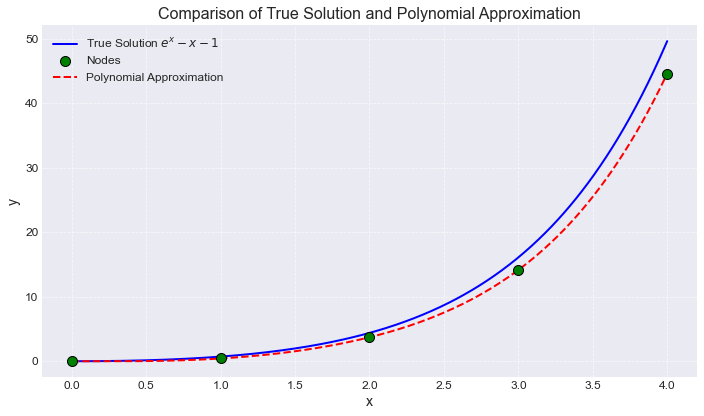

In [85]:

# Define the coefficients matrix A and the right-hand side vector b
# The system of equations will be solve in the form of Ax= b
# A is a 4x4 matrix representing the coefficient of the variables of equations
# B is a 4x1 vector representing the constants on the right hand side of the equations
    
A = np.array([
    [1, 2, 3, 4],
    [0, 4, 16, 48],
    [-3, 0, 27, 162],
    [-8, -16, 0, 256]
])

b = np.array([1, 2, 3, 4])

# Solve the system of equations
solution = np.linalg.solve(A, b)

# Print the solution
print("Solution:")
print("a2 =", solution[0])
print("a3 =", solution[1])
print("a4 =", solution[2])
print("a5 =", solution[3])

# Define the function of true solution
def f(x):
    return np.exp(x) - x - 1

# Creating the range of x values for ploting the true solution and polynominal approximation
x = np.linspace(0, 4, 400)  
true_solution = f(x)

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot the true solution
plt.plot(x, true_solution, "b-", linewidth=2, label="True Solution $e^x - x - 1$")

# Define nodes with uniform
node_x = np.array([0, 1, 2, 3, 4])
node_y = solution[0]*node_x**2 + solution[1]*node_x**3 + solution[2]*node_x**4 + solution[3]*node_x**5

# Plot the nodes
plt.scatter(node_x, node_y, color='g', s=100, edgecolors='k', zorder=5, label='Nodes')

# Plot the polynominal approximation
x = np.linspace(0, 4, 400)
y = solution[0]*x**2 + solution[1]*x**3 + solution[2]*x**4 + solution[3]*x**5
plt.plot(x, y, 'r', linewidth=2, linestyle='--', label='Polynomial Approximation')

# Show the plot
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('Comparison of True Solution and Polynomial Approximation', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



## Question 3: Using Chebyshev nodes

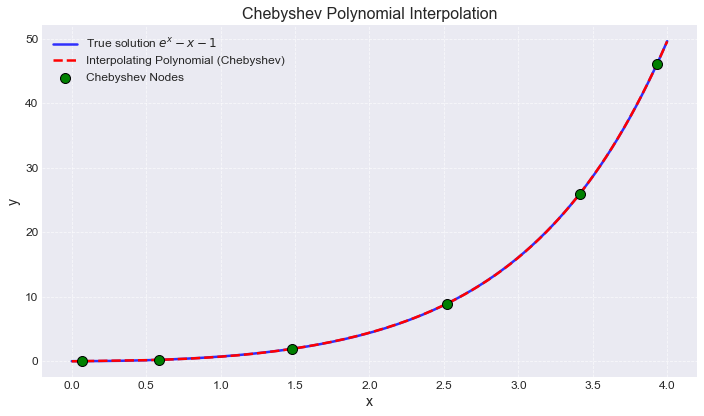

In [86]:

# Define the function for true solution
def f(x):
    return np.exp(x) - x - 1

# Degree of the polynomial
degree = 5

# Calculate Chebyshev nodes in [0, 4]
n = degree + 1  # Number of nodes
chebyshev_nodes = 2 * np.cos((2 * np.arange(1, n + 1) - 1) * np.pi / (2 * n)) + 2

# Calculate function values at Chebyshev nodes
function_values = f(chebyshev_nodes)

# Construct the Vandermonde matrix
V = np.vander(chebyshev_nodes, increasing=True)

# Solve for the coefficients using the least squares method
coefficients = np.linalg.solve(V, function_values)

# Define a range of x values for plotting
x = np.linspace(0, 4, 400)

# Evaluate the interpolating polynomial using np.polyval
interp = np.polyval(coefficients[::-1], x)

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot the original function and the interpolating polynomial
plt.plot(x, f(x), "b-", label="True solution $e^x - x - 1$", linewidth=2.5, alpha=0.8)
plt.plot(x, interp, 'r--', label='Interpolating Polynomial (Chebyshev)', linewidth=2.5)
plt.scatter(chebyshev_nodes, function_values, c='green', s=100, edgecolors='k', zorder=5, label='Chebyshev Nodes')

# Adding labels, title, grid, and legend
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('Chebyshev Polynomial Interpolation', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

## Question 4

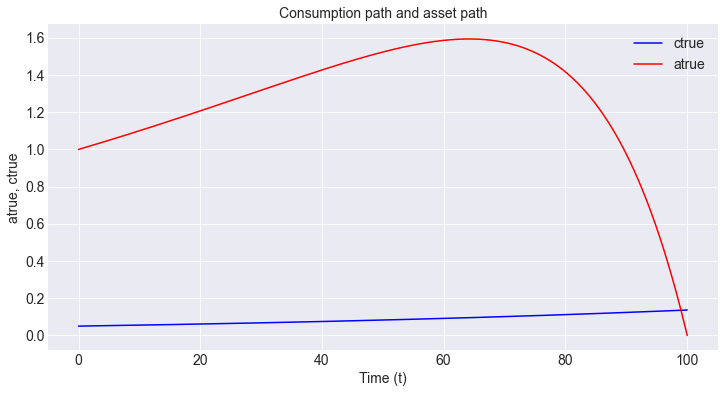

In [89]:
# This is the true solution of the problem 

# Define parameters
rho = 0.05
r = 0.06
a0 = 1.0
aT = 0.0
epsilon = 1e-6

T=100 #time interval
n= 10**4# number of steps
t=np.linspace(0,T,n)
c0 = rho*(aT*np.exp(-r*T)-a0)/(np.exp(-rho*T)-1)
ctrue = c0*np.exp((r-rho)*t)
atrue = np.exp(r*t)*(1/rho*c0*np.exp(-rho*t)+a0-1/rho*c0)


# Plot ctrue against t
plt.figure(figsize=(12, 6))
plt.plot(t, ctrue, label='ctrue', color='blue')
plt.plot(t, atrue, label='atrue', color='red')
plt.ylabel('atrue, ctrue')
plt.xlabel('Time (t)')

plt.title('Consumption path and asset path')
plt.legend()
plt.grid(True)
plt.show()

## Question 4 : Using shooting Method

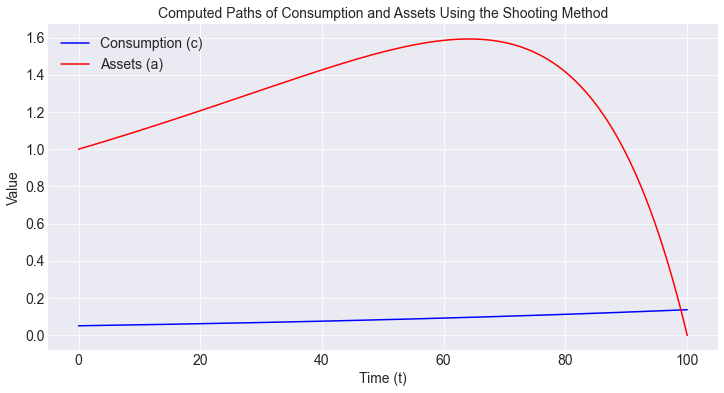

In [90]:

# Define parameters
rho = 0.05
r = 0.06
a0 = 1.0
aT = 0.0
T = 100  # Update time interval
n = 10**4  # Update number of steps
h= T/n #step size
t = np.linspace(0, T, n)

def derivatives(t, c, a):
    """
    Compute the derivatives of c and a based on the differential equations.

    Args:
    - t (float): Current time 
    - c (float): Current consumption level
    - a (float): Current asset level

    Returns:
    - c_dot (float): Derivative of consumption
    - a_dot (float): Derivative of assets
    """
    c_dot = c * (r - rho)
    a_dot = r * a - c
    return c_dot, a_dot

def euler_integration(c0, h, n):
    """
    Integrate the system using Euler's method.

    Args:
    - c0 (float): Initial guess for consumption at t=0
    - h (float): Step size for integration
    - n (int): Number of steps

    Returns:
    - c_values (np.array): Array of consumption values over time
    - a_values (np.array): Array of asset values over time
    """
    # Initializing arrays to store values of c and a
    c_values = np.zeros(n)
    a_values = np.zeros(n)
    
    # Set initial conditions
    c_values[0] = c0
    a_values[0] = 1.0  # Given a0 = 1

    # Loop over time steps to compute c and a using Euler's method
    for i in range(1, n):
        c_dot, a_dot = derivatives(t[i-1], c_values[i-1], a_values[i-1])
        c_values[i] = c_values[i-1] + h * c_dot
        a_values[i] = a_values[i-1] + h * a_dot

    return c_values, a_values

# Initial bounds for c0_guess for the shooting method
c0_lower = 0
c0_upper = 1  # Consume all interest

# Set a convergence criterion
epsilon = 1e-6

# Function to compute aT for a given c0_guess using Euler's method
def compute_aT(c0_guess, h, n):
    _, a_values = euler_integration(c0_guess, h, n)
    return a_values[-1]  # Return the last value of assets, which is aT

def shooting_method(c0_lower, c0_upper, h, n, epsilon):
    """
    Solve for the correct initial consumption c0 using the shooting method.

    Args:
    - c0_lower (float): Lower bound for c0 guess
    - c0_upper (float): Upper bound for c0 guess
    - h (float): Step size for integration
    - n (int): Number of steps
    - epsilon (float): Convergence criterion

    Returns:
    - c_values (np.array): Array of consumption values over time
    - a_values (np.array): Array of asset values over time
    """
    
    # Start with a midpoint guess for c0
    c0_guess = (c0_lower + c0_upper) / 2
    
    # Iterate until convergence criterion is met
    while (c0_upper - c0_lower) > epsilon:
        # Compute aT for the current c0_guess
        aT_guess = compute_aT(c0_guess, h, n)
        
        # Adjust c0 bounds based on aT_guess relative to desired aT
        if aT_guess < aT:
            c0_upper = c0_guess
        else:
            c0_lower = c0_guess
        
        # Update c0_guess for next iteration
        c0_guess = (c0_lower + c0_upper) / 2

    # Once we have a satisfactory c0_guess, compute the paths of c and a using Euler's method
    c_values, a_values = euler_integration(c0_guess, h, n)
    
    return c_values, a_values


# Solve the problem using the shooting method
c_values, a_values = shooting_method(c0_lower, c0_upper, h, n, epsilon)

# Print the results
#for c, a in zip(c_values, a_values):
    #print(f"For c = {c:.4f}, a = {a:.4f}")
    
# Plot the computed paths of c and a
plt.figure(figsize=(12, 6))

# Plot for consumption c
plt.plot(t, c_values, label='Consumption (c)', color='blue')

# Plot for assets a
plt.plot(t, a_values, label='Assets (a)', color='red')

# Annotations and display settings
plt.title('Computed Paths of Consumption and Assets Using the Shooting Method')
plt.xlabel('Time (t)')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()



## Question 4 : Using Projection method 

p_1 = 0.009091844513328964
p_2 = -0.00011042347702134295
p_3 = 1.9822954743585882e-07
p_4 = -2.0057430534709923e-08
p_5 = 1.0025638249156666e-10
q_0 = 0.05295960816958221
q_1 = 0.0005298707183401595
q_2 = 2.6335238406729956e-06
q_3 = 9.218128108571452e-09
q_4 = 1.6687990541380495e-11
q_5 = 7.946662162561981e-14


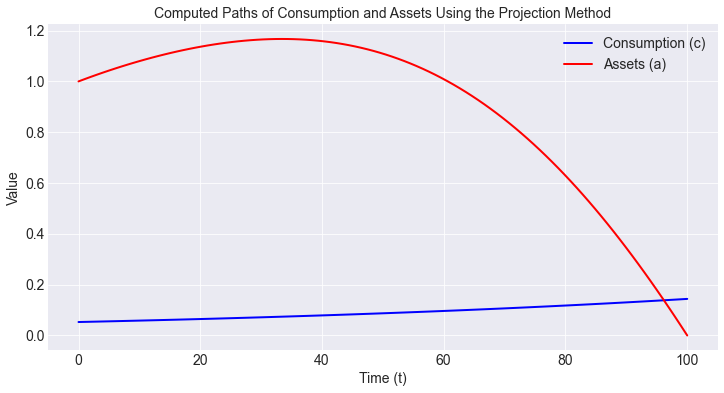

In [91]:

#  Define a coefficient matrix for the system of equations

A = np.array([[-0.2, 16, -3600, 22400, 608000, 1, 20, 400, 8000, 160000, 3200000],
              [-1.4, -16, -33600, 102400, 6656000, 1, 40, 1600, 64000, 2560000, 102400000],
              [-2.6, -96, -118800, 86400, 18144000, 1, 60, 3600, 216000, 12960000, 777600000],
              [-3.8, -224, -288000, -409600, 8192000, 1, 80, 6400, 512000, 40960000, 3276800000],
              [-4.4, -306, -413100, -1020600, -26244000, 1, 90, 8100, 729000, 65610000, 5904900000],
              [0, 0, 0, 0, 0, -0.01, 0.8, 36, 1120, 30400, 768000],
              [0, 0, 0, 0, 0, -0.01, 0.6, 64, 4160, 230400, 11776000],
              [0, 0, 0, 0, 0, -0.01, 0.4, 84, 8640, 734400, 57024000],
              [0, 0, 0, 0, 0, -0.01, 0.2, 96, 14080, 1638400, 172032000],
              [0, 0, 0, 0, 0, -0.01, 0.1, 99, 17010, 2259900, 269001000],
              [100, 10000, 1000000, 100000000, 10000000000, 0, 0, 0, 0, 0, 0]])

# Right-hand side of the equations
B = np.array([0.06, 0.06, 0.06, 0.06, 0.06, 0, 0, 0, 0, 0, -1])

# Solve the system of equations
solution = np.linalg.solve(A, B)

# Extracting the solution into individual variables
p_1, p_2, p_3, p_4, p_5, q_0, q_1, q_2, q_3, q_4, q_5 = solution

# Displaying the values of p_i and q_i
print(f'p_1 = {p_1}')
print(f'p_2 = {p_2}')
print(f'p_3 = {p_3}')
print(f'p_4 = {p_4}')
print(f'p_5 = {p_5}')
print(f'q_0 = {q_0}')
print(f'q_1 = {q_1}')
print(f'q_2 = {q_2}')
print(f'q_3 = {q_3}')
print(f'q_4 = {q_4}')
print(f'q_5 = {q_5}')


# Generate 100 x values in the range from 0 to 4
x = np.linspace(0, 100, 100)

# Define the equations using the substituted values
a = 1 + p_1 * x + p_2 * x**2 + p_3 * x**3 + p_4 * x**4 + p_5 * x**5
c = q_0 + q_1 * x + q_2 * x**2 + q_3 * x**3 + q_4 * x**4 + q_5 * x**5


# Plot the computed paths of c and a
plt.figure(figsize=(12, 6))

# Plot for consumption c
plt.plot(x, c, label='Consumption (c)', linewidth=2, color='blue')

# Plot for assets a
plt.plot(x, a, label='Assets (a)', linewidth=2,color='red')

# Annotations and display settings
plt.title('Computed Paths of Consumption and Assets Using the Projection Method')
plt.xlabel('Time (t)')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Part 2: Derivatives Pricing


## Question 1

In [92]:

#Pricing the American option using the binomial
#Define a class for American option using binominal tree

class AmericanCallOption:
    # Construct a function for initialize parameters
    def __init__(self, S0, K, r, T, N, ρ, σ):
        self.S0 = S0 # initial stock price
        self.K = K # strike price
        self.r = r # risk-free rate (annual)
        self.T = T # Time to expire in years (5/12 )
        self.N = N # number of steps/nodes
        self.ρ = ρ #dividend rate(annual)
        self.σ = σ # volatility

        self.dt = T / float(N) # time interval for each nodes in the tree
        self.df = np.exp(-r * self.dt) # discount factor for single time node
        
        self.u = np.exp(σ * np.sqrt(self.dt)) #up factor
        self.d = np.exp(-σ * np.sqrt(self.dt)) #down factor
        self.qu = (np.exp((r - ρ) * self.dt) - self.d) / (self.u - self.d) #risk- neutral probability for upward movement
        self.qd = 1 - self.qu #risk- neutral probability for downward movement
        
    # Define a function to initialize the binominal stock price tree
    def stock_price_tree(self):
        self.STs = [np.array([self.S0])] # inititalize the tree with current stock price which is S0 
        for i in range(self.N): # Loop and build the tree using the up and down factors
            prev_nodes = self.STs[-1] #last set of the prices in the tree
            stock_prices = np.concatenate((prev_nodes * self.u, [prev_nodes[-1] * self.d]))
            self.STs.append(stock_prices) # add stock prices into the tree
            
    # Define a function to return the payoff
    def payoff_tree(self):
        payoffs = np.maximum(0, self.STs[self.N] - self.K) # Compute the payoffs at expiration
        for i in reversed(range(self.N)): #Using loop and backward induction to compute the value at each node
            payoffs = (payoffs[:-1] * self.qu + payoffs[1:] * self.qd) * self.df #discounted expected payoff at each node
            payoffs = np.maximum(payoffs, self.STs[i] - self.K)  # Check early exercise and get the max value
        return payoffs[0] # return the payoffs value at today's price
    
    
    # Define the function to get final price
    def price(self):
        self.stock_price_tree() # initialize the stock price tree 
        return self.payoff_tree() # and get the final price of the option by using backward method
 
# Given parameters
# Set random seed for reproducibility
np.random.seed(50)
S0 = 50
Kc = 50
Ka = 3
r = 0.03
T = 5/12
N = int(12 * 21 * 5 * (5/12)) #represent trading activity at an hourly rate over the span of 5 months, assuming 21 trading days per month and 5 trading hours per day( number of steps )
σ = 0.4
ρ = 0.01
monitoring_dates= 5
M = 1000 # Number of simulation

# Price the American Call Option
option = AmericanCallOption(S0, Kc, r, T, N, ρ, σ)
price = option.price()
print(f"The American call option price is: ${price:.4f}")

# Simulating a stock price path
def simulate_stock_path(S0, r, ρ, σ, dt, N):
    prices = [S0] # create a list of prices with SO
    for _ in range(N):
        dz = np.random.normal() # Generate a standard normal random variable
        dSt = (r - ρ) * prices[-1] * dt + σ * prices[-1] * np.sqrt(dt) * dz # Compute the change price in the stock based on GBM
        prices.append(prices[-1] + dSt) # append the stock prices into the list of prices
    return prices

# Define a function to compute Asian option (Ca)
def compound_option_price(S0, Kc, Ka, r, ρ, σ, T, M, N, monitoring_dates):
    payoffs = [] # a empty list to store the payoffs from each. simulation
    dt = T / N
    monitoring_steps = N // monitoring_dates
    
    # Simulate M different stock price paths
    for _ in range(M):# 
        stock_path = simulate_stock_path(S0, r, ρ, σ, dt, N)
        monitoring_stock_prices = stock_path[::monitoring_steps][:monitoring_dates] # get the stock prices at the mornitoring dates
        # For each monitoring date compute the price of American option
        Cc_values = [AmericanCallOption(monitoring_stock_prices[j], Kc, r, T * (monitoring_dates - j) / monitoring_dates, N, ρ, σ).price() for j in range(monitoring_dates)]
        avg_Cc = np.mean(Cc_values) # Compute the average of American option prices 
        payoff = max(avg_Cc - Ka, 0) # payoff of Asian option at maturity
        payoffs.append(payoff) # Add the payoff to the list 
    
    return np.exp(-r * T) * np.mean(payoffs) #return the price of Asian option 


# Call and print out the result
compound_price = compound_option_price(S0, Kc, Ka, r, ρ, σ, T, M, N, monitoring_dates)
print(f"The call on call compound option price is: ${compound_price:.4f}")

#To compute Delta and Gamma, we need to compute the up and down movement
u = np.exp(σ * np.sqrt(T/monitoring_dates))  # up factor
d = 1/u  # down factor
S_up = S0 * u # stock price of up movement 
S_down = S0 * d # stock price of down movement

# Price C_a for each of these stock prices
V_up = compound_option_price(S_up, Kc, Ka, r, ρ, σ, T, M, N, monitoring_dates)
V_0 = compound_option_price(S0, Kc, Ka, r, ρ, σ, T, M, N, monitoring_dates)  # this is the value of Ca
V_down = compound_option_price(S_down, Kc, Ka, r, ρ, σ, T, M, N, monitoring_dates)


# Compute Delta and Gamma
delta = (V_up - V_down) / (S_up - S_down)
gamma = ((V_up - V_0)/(S_up - S0) - (V_0 - V_down)/(S0 - S_down)) / ((S_up - S_down)/2.)

print(f"Delta of C_a: {delta:.4f}")
print(f"Gamma of C_a: {gamma:.4f}")


The American call option price is: $5.3051
The call on call compound option price is: $2.7984
Delta of C_a: 0.4438
Gamma of C_a: 0.0400


## Question 2a:  Compute the Asian option using the Crude Monte Carlo

In [34]:

# Parameters
# Setting a random seed for reproducibility
np.random.seed(50)
S0 = 50 # Initial stock price
K = 50  # Strike price of the Asian option
sigma = 0.2  # Volatility of the stock
r = 0.02     # Risk-free rate
T = 5/12  # Time to maturity (5 months converted to years)
n = 5     # Number of time steps
N = 100000  # Number of simulation paths

# Time step
Dt = T / n

# Initialize arrays for stock price paths
Spath = np.zeros((N, n + 1))

# Generate random numbers to model stock price movements
ranvec = np.random.randn(N, n)

# Set initial values
Spath[:, 0] = S0

# Generate stock price paths using Geometric Brownian Motion
for j in range(1, n + 1):
    Spath[:, j] = Spath[:, j - 1] * np.exp((r - 0.5 * sigma**2) * Dt + sigma * np.sqrt(Dt) * ranvec[:, j - 1])

# Calculate arithmetic average at each time step, for each simulation path
arithave = np.mean(Spath[:, 1:], axis=1)

# Calculate payoffs
Payoff = np.maximum(arithave - K, 0)

# Calculate the Asian option price
option_price = np.exp(-r * T) * np.mean(Payoff)

# Calculate variance
variance = np.var(Payoff)

# Calculate confidence interval
SE = np.sqrt(variance / N)  # standard error
confidence_interval = [option_price - 1.96 * SE, option_price + 1.96 * SE]

# Display results
print("Results with Crude Monte Carlo:")
print(f'Asian Option Price: {option_price:.4f}')
print(f'Variance: {variance:.4f}')
print(f'95% Confidence Interval: [{confidence_interval[0]:.4f}, {confidence_interval[1]:.4f}]')


Results with Crude Monte Carlo:
Asian Option Price: 1.8280
Variance: 7.5271
95% Confidence Interval: [1.8110, 1.8450]


## Question 2b: Compute the Asian option price using antithetic sampling as the variance reduction technique

In [93]:

# Set random seed for reproducibility
np.random.seed(50)

# Define parameters
S0 = 50       # Initial stock price
K = 50        # Strike price
sigma = 0.2   # Volatility
r = 0.02      # Risk-free rate
T = 5/12      # Time to maturity in years (5 months)
n = 5         # Number of time steps
N = 100000    # Number of simulation paths

# Calculate time step
Dt = T / n

# Initialize arrays to store stock price paths
Spath_orig = np.zeros((N, n + 1)) # original paths
Spath_anti = np.zeros((N, n + 1)) # antithetic paths

# Generate random numbers for the simulation
ranvec_orig = np.random.randn(N, n) # Random numbers for original paths
ranvec_anti = -ranvec_orig  # Generate antithetic random numbers

# Set initial stock prices
Spath_orig[:, 0] = S0
Spath_anti[:, 0] = S0

# Simulate stock price paths using Geometric Brownian motion 
for j in range(1, n + 1):
    Spath_orig[:, j] = Spath_orig[:, j - 1] * np.exp((r - 0.5 * sigma**2) * Dt + sigma * np.sqrt(Dt) * ranvec_orig[:, j - 1])
    Spath_anti[:, j] = Spath_anti[:, j - 1] * np.exp((r - 0.5 * sigma**2) * Dt + sigma * np.sqrt(Dt) * ranvec_anti[:, j - 1])

# Calculate arithmetic averages of stock prices
arith_avg_orig = np.mean(Spath_orig[:, 1:], axis=1)
arith_avg_anti = np.mean(Spath_anti[:, 1:], axis=1)

# Calculate option payoffs
Payoff_orig = np.maximum(arith_avg_orig - K, 0)
Payoff_anti = np.maximum(arith_avg_anti - K, 0)

# Calculate Asian option prices
option_price_orig = np.exp(-r * T) * np.mean(Payoff_orig)
option_price_anti = np.exp(-r * T) * np.mean(Payoff_anti)

# Combine results using antithetic sampling
option_price_combined = 0.5 * (option_price_orig + option_price_anti)

#Calculate the variance
variance_combined = 0.25 * (np.var(Payoff_orig) + np.var(Payoff_anti))

# Calculate confidence interval
SE_combined = np.sqrt(variance_combined / N) # Standard Error
confidence_interval_combined = [option_price_combined - 1.96 * SE_combined, option_price_combined + 1.96 * SE_combined]

# Display results
print("Results with Antithetic Sampling:")
print(f'Combined Asian Option Price: {option_price_combined:.4f}')
print(f'Variance (Combined): {variance_combined:.4f}')
print(f'95% Confidence Interval (Combined): [{confidence_interval_combined[0]:.4f}, {confidence_interval_combined[1]:.4f}]')


Results with Antithetic Sampling:
Combined Asian Option Price: 1.8250
Variance (Combined): 3.7784
95% Confidence Interval (Combined): [1.8130, 1.8371]


## Question 2c: Compute the Asian option price using control variates as the variance reduction technique


In [94]:
# Define parameters
S0 = 50       # Initial stock price
K = 50        # Strike price
sigma = 0.2   # Volatility
r = 0.02      # Risk-free rate
T = 5/12      # Time to maturity in years (5 months)
n = 5         # Number of time steps
N = 100000    # Number of simulation paths

# Calculate time step
Dt = T / n

# Generate random numbers
ranvec = np.random.randn(N, n)

# Calculate European option payoff in each path, we choose European as control variates
Spath_Euro = np.zeros((N, n + 1)) # initial matrix to store stock paths
Spath_Euro[:, 0] = S0  # set initial stock price = SO
for j in range(1, n + 1): 
    Spath_Euro[:, j] = Spath_Euro[:, j - 1] * np.exp((r - 0.5 * sigma**2) * Dt + sigma * np.sqrt(Dt) * ranvec[:, j - 1])
Euro_Payoff = np.exp(-r * T) * np.maximum(Spath_Euro[:, -1] - K, 0)

# Calculate Asian option payoff in each path
Spath_Asian = Spath_Euro  # Reuse the same paths
Asian_Payoff = np.exp(-r * T) * np.maximum(np.mean(Spath_Asian[:, 1:], axis=1) - K, 0)

# Calculate Black-Scholes price of the European option
d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)
BS_Price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Compute the coefficient c used in the control variates
c = np.cov(Asian_Payoff, Euro_Payoff)[0, 1] / np.var(Euro_Payoff)

# Compute the controlled estimator
Controlled_Estimator = Asian_Payoff - c * (Euro_Payoff - BS_Price)

# Estimate the Asian option price using control variates
option_price_controlled = np.mean(Controlled_Estimator)

# Compute variance and confidence interval
variance_controlled = np.var(Controlled_Estimator)
SE_controlled = np.sqrt(variance_controlled / N) #standard error
confidence_interval_controlled = [option_price_controlled - 1.96 * SE_controlled, option_price_controlled + 1.96 * SE_controlled]

# Display results
print("Results with Control Variates:")
print(f"Control Variates Asian Option Price: {option_price_controlled:.4f}")
print(f"Variance (Control Variates): {variance_controlled:.4f}")
print(f"95% Confidence Interval (Control Variates): [{confidence_interval_controlled[0]:.4f}, {confidence_interval_controlled[1]:.4f}]")


Results with Control Variates:
Control Variates Asian Option Price: 1.8252
Variance (Control Variates): 1.6900
95% Confidence Interval (Control Variates): [1.8172, 1.8333]


## Question 2d : Compute the Asian option price using Quasi-Monte Carlo method. Use Halton sequence

In [98]:

# Set random seed for reproducibility
np.random.seed(50)

# Define parameters
S0 = 50       # Initial stock price
K = 50        # Strike price
sigma = 0.2   # Volatility
r = 0.02      # Risk-free rate
T = 5/12      # Time to maturity in years (5 months)
n = 5         # Number of time steps
N = 100000    # Number of simulation paths

# Calculate time step
Dt = T / n

def halton_sequence(size, base):
    """Generate Halton sequence for a given size and base."""
    sequence = []
    for i in range(size):
        n = i + 1
        hn = 0 # initializes the Halton number for the current i.
        f = 1 / base
        while n > 0:
            r = n % base
            hn += f * r
            f /= base
            n //= base
        sequence.append(hn)
    return np.array(sequence)


# Generate Halton sequences with base 3
halton_base3 = halton_sequence(N * n, 3).reshape(N, n)

# Convert Halton sequences to standard normally distributed numbers
ranvec = norm.ppf(halton_base3)

# Calculate Asian option payoff in each path
Spath = np.zeros((N, n + 1)) # array to store the simulated stock price paths
Spath[:, 0] = S0
for j in range(1, n + 1): 
    # Simulate the stock price using the Geometric Brownian Motion
    Spath[:, j] = Spath[:, j - 1] * np.exp((r - 0.5 * sigma**2) * Dt + sigma * np.sqrt(Dt) * ranvec[:, j - 1])
Asian_Payoff = np.exp(-r * T) * np.maximum(np.mean(Spath[:, 1:], axis=1) - K, 0) # Asian payoff

# Estimate the Asian option price using Quasi-Monte Carlo
option_price_qmc = np.mean(Asian_Payoff)

# Compute variance and confidence interval
variance_qmc = np.var(Asian_Payoff)
SE_qmc = np.sqrt(variance_qmc / N) #standard error
confidence_interval_qmc = [option_price_qmc - 1.96 * SE_qmc, option_price_qmc + 1.96 * SE_qmc]

# Display results
print("Results with Quasi-Monte Carlo:")
print(f"Quasi-Monte Carlo Asian Option Price: {option_price_qmc:.4f}")
print(f"Variance (Quasi-Monte Carlo): {variance_qmc:.4f}")
print(f"95% Confidence Interval (Quasi-Monte Carlo): [{confidence_interval_qmc[0]:.4f}, {confidence_interval_qmc[1]:.4f}]")


Results with Quasi-Monte Carlo:
Quasi-Monte Carlo Asian Option Price: 1.0432
Variance (Quasi-Monte Carlo): 1.7486
95% Confidence Interval (Quasi-Monte Carlo): [1.0350, 1.0514]


# Part 3: Dynamic Programming

## Question 2: Solve this problem by value function iteration. Plot the value function. Plot the policy function ( the optimal $ k_t+1 $ or $ c_t$  as a function of $ k_t $). The discretized state space has to contain at least 20 nodes.

In [99]:

# Parameters
α = 1/3
β = 0.95
δ = 0.1

# Define the grid for capital stock
k_min = 2
k_max = 5
num_points = 20
k_grid = np.linspace(k_min, k_max, num_points)

# Initialize the value function
V = np.zeros(num_points)

# Maximum number of iterations
max_iterations = 1000

# Convergence criteria
tolerance = 1e-6

for iteration in range(max_iterations):
    max_error = 0  # Track the maximum error in this iteration
    for i, k in enumerate(k_grid):
        # Calculate the value for each choice of k'
        values = []
        for j, k_prime in enumerate(k_grid):
            value = np.log(k * (1 - δ) + k ** α - k_prime) + β * V[j]
            values.append(value)
        # Find the maximum value and the corresponding k'
        max_value = max(values)
        max_k_prime = k_grid[values.index(max_value)]
        # Update V(k) with the maximum value
        max_error = max(max_error, abs(max_value - V[i]))
        V[i] = max_value

    # Check for convergence
    if max_error < tolerance:
        break

# Now, V contains the converged value function

# Calculate the policy function (optimal k' for each k)
policy_function = np.zeros(num_points)
for i, k in enumerate(k_grid):
    values = []
    for j, k_prime in enumerate(k_grid):
        value = np.log(k * (1 - δ) + k ** α - k_prime) + β * V[j]
        values.append(value)
    policy_function[i] = k_grid[values.index(max(values))]


/var/folders/7g/wq262zkd7yvdydgxzcfz_6540000gn/T/ipykernel_91190/335417719.py:27: RuntimeWarning: invalid value encountered in log
  value = np.log(k * (1 - δ) + k ** α - k_prime) + β * V[j]
/var/folders/7g/wq262zkd7yvdydgxzcfz_6540000gn/T/ipykernel_91190/335417719.py:47: RuntimeWarning: invalid value encountered in log
  value = np.log(k * (1 - δ) + k ** α - k_prime) + β * V[j]


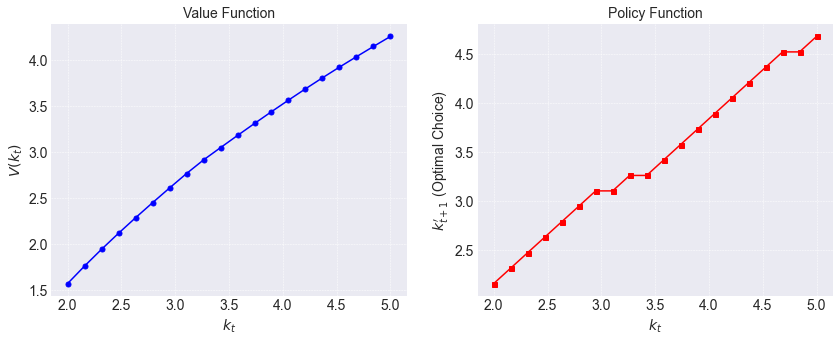

In [100]:
# Set plot style


# Set font size
font_size = 14
plt.rc('font', size=font_size)  # controls default text sizes
plt.rc('axes', titlesize=font_size)  # font size of the axes title
plt.rc('axes', labelsize=font_size)  # font size of the x and y labels
plt.rc('xtick', labelsize=font_size)  # font size of the tick labels
plt.rc('ytick', labelsize=font_size)  # font size of the tick labels
plt.rc('legend', fontsize=font_size)  # legend font size

# Plot the value function and policy function
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Value Function
axs[0].plot(k_grid, V, 'b-', marker='o', markersize=5)
axs[0].set_title("Value Function")
axs[0].set_xlabel("$k_t$")
axs[0].set_ylabel("$V(k_t)$")
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Policy Function
axs[1].plot(k_grid, policy_function, 'r-', marker='s', markersize=5)
axs[1].set_title("Policy Function")
axs[1].set_xlabel("$k_t$")
axs[1].set_ylabel("$k_{t+1}^\prime$ (Optimal Choice)")
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.show()
